<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Module15Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:

X_lin, y_lin = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.8,
    random_state=42,
)

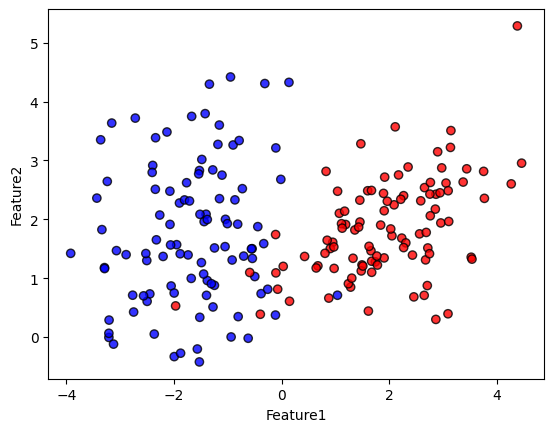

In [4]:
# Dataset visulization :

plt.scatter(X_lin[:,0],X_lin[:,1],c=y_lin,cmap='bwr',edgecolors='k',alpha=0.8)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# x_lin[:,0] mane : sob row naw ar 0 number col neo . c = y_lin mane label onujayi color.
#alpha =0.8 used korar karon holo plot transparency socchota jonno alpha man 0 theke 1

In [5]:
#Train test split :
X_train,X_test,y_train,y_test = train_test_split(X_lin,y_lin, test_size=0.2, random_state=42)


# Feature Scaling :
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)


In [6]:
# Linear SVM Classifier Train :
svm_linear = SVC(kernel='linear',C=1.0,random_state=42)
svm_linear.fit(X_train_scaler,y_train)
#kernel ='linear' holo sorolrekha boundary ar C = 1.0 margin ar error er jonno

SVC(kernel='linear', random_state=42)

In [7]:
y_pred = svm_linear.predict(X_test_scaler)
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score :",acc)

Accuracy Score : 0.975


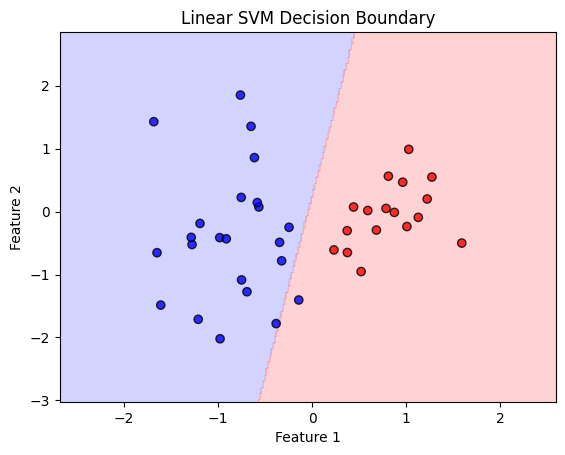

In [10]:
def plot_decision_boundary(model, X, y, title='Decision boundary'):
   x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx, yy = np.meshgrid(
       np.linspace(x_min, x_max, 300),
       np.linspace(y_min, y_max, 300)
        )
   grid = np.c_[xx.ravel(), yy.ravel()]
   Z = model.predict(grid)
   Z = Z.reshape(xx.shape)

   plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
   plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.8)
   plt.title(title)
   plt.xlabel('Feature 1')
   plt.ylabel('Feature 2')
   plt.show()

plot_decision_boundary(svm_linear, X_test_scaler, y_test, title='Linear SVM Decision Boundary')

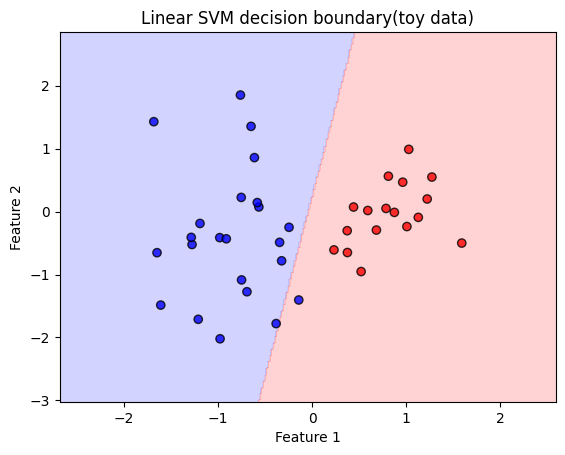

In [11]:
plot_decision_boundary(
    svm_linear,
    X_test_scaler,
    y_test,
    title='Linear SVM decision boundary(toy data)'
)